In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Criterios
1. Qué temas se abordan en las distintas canciones expuestas, y si hay relación entre ellas 

2. Cómo fueron cambiando los sentimientos en las canciones de la epoca

In [ ]:
df = pd.read_csv('Final database.csv', low_memory=False)

df['Release_date'] = pd.to_datetime(df['Release_date'], errors='coerce')

emotion_cols = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust','negative','positive']
df = df[(df['Release_date'].dt.year >= 1990) & (df['Release_date'].dt.year <= 2000)]

df_90_2s = df.drop_duplicates(subset='Title')
df_90_1s = df.drop_duplicates(subset='Title')

df_90_2s_filtered = df_90_2s[['Title', 'Release_date'] + emotion_cols]
df_90_1s_filtered = df_90_1s[['Title', 'Release_date'] + emotion_cols]

,Title,Release_date,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
753,mary janes last dance,1993-11-16,2.0,5.0,1.0,2.0,5.0,4.0,1.0,4.0,6.0,5.0
3408,have yourself a merry little christmas,2000-11-03,0.0,3.0,0.0,1.0,4.0,0.0,1.0,2.0,1.0,6.0
3715,in the end,2000-10-24,4.0,3.0,3.0,2.0,0.0,3.0,2.0,3.0,5.0,3.0
5232,"merry christmas, happy holidays",1998-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5745,stayin alive - from saturday night fever sound...,1990-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170235,high speed,2000-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170261,離人,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170365,軋車,1999-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170368,你最珍貴,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gráfico criterio 1

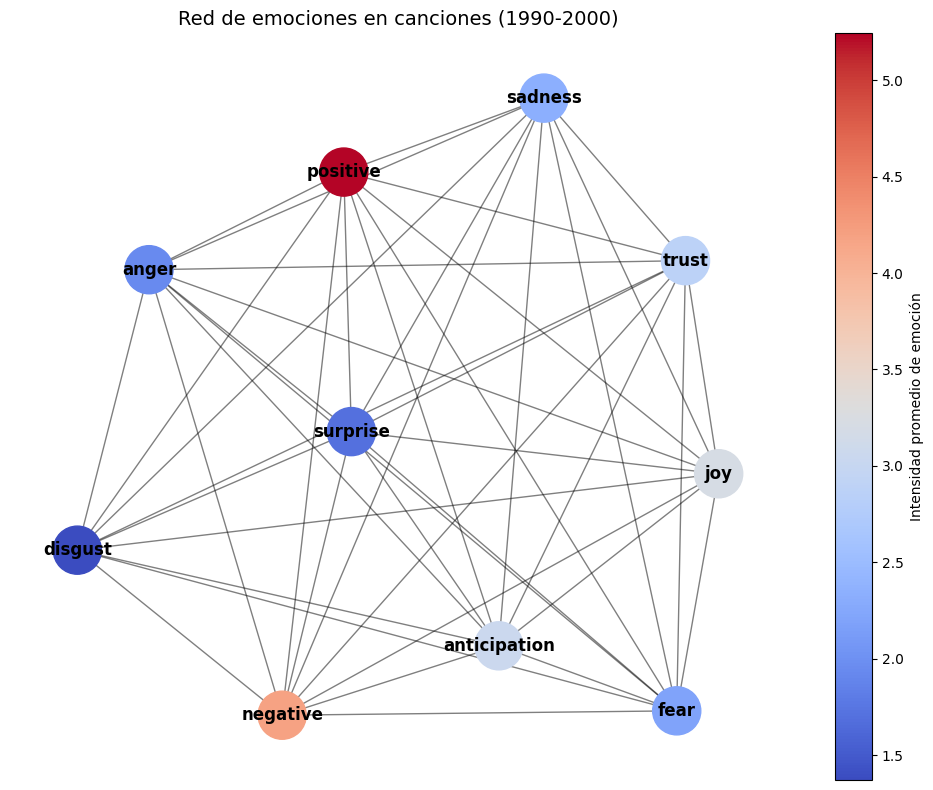

In [24]:
co_matrix = pd.DataFrame(0, index=emotion_cols, columns=emotion_cols)

for _, row in df_90_2s.iterrows():
    active = [emotion for emotion in emotion_cols if row[emotion] > 0]
    for i in range(len(active)):
        for j in range(i + 1, len(active)):
            co_matrix.loc[active[i], active[j]] += 1
            co_matrix.loc[active[j], active[i]] += 1

G = nx.from_pandas_adjacency(co_matrix)

mean_intensity = df_90_2s[emotion_cols].mean()
node_colors = [mean_intensity[emotion] for emotion in G.nodes()]

pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(10, 8))

nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='coolwarm', node_size=1200, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=12, font_weight='bold')

cbar = fig.colorbar(nodes, ax=ax)
cbar.set_label('Intensidad promedio de emoción')

ax.set_title('Red de emociones en canciones (1990-2000)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

Gráfico criterio 2

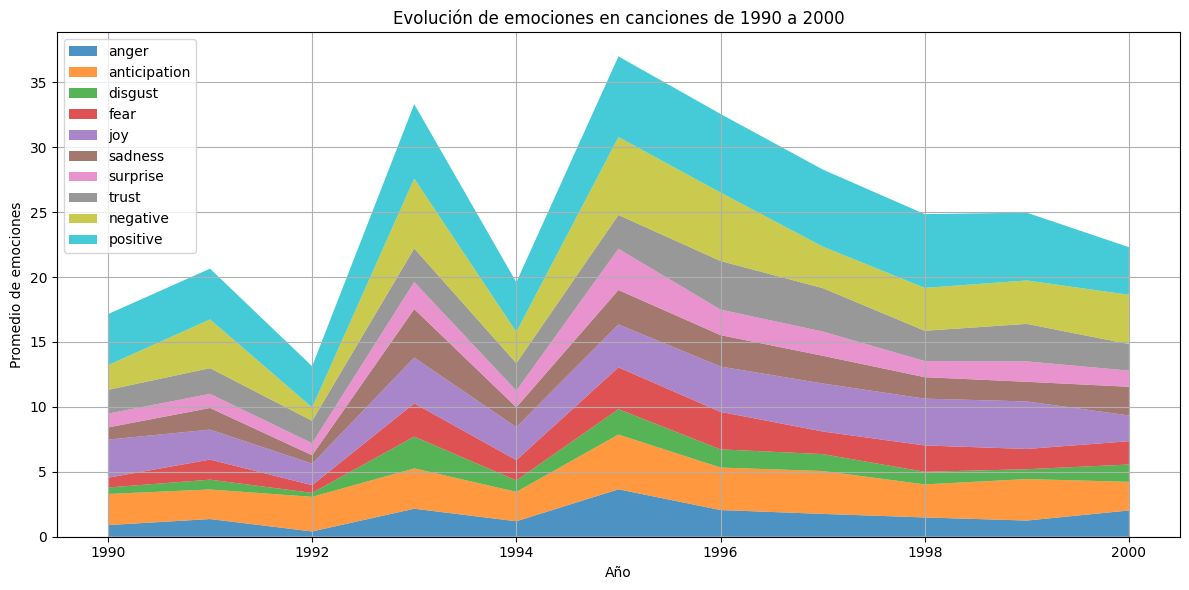

In [25]:
df['Year'] = df['Release_date'].dt.year

df_90s = df[(df['Year'] >= 1990) & (df['Year'] <= 2000)]

emotion_trends = df_90s.groupby('Year')[emotion_cols].mean()

plt.figure(figsize=(12, 6))
plt.stackplot(emotion_trends.index, emotion_trends.T, labels=emotion_cols, alpha=0.8)
plt.legend(loc='upper left')
plt.title('Evolución de emociones en canciones de 1990 a 2000')
plt.xlabel('Año')
plt.ylabel('Promedio de emociones')
plt.grid(True)
plt.tight_layout()
plt.show()